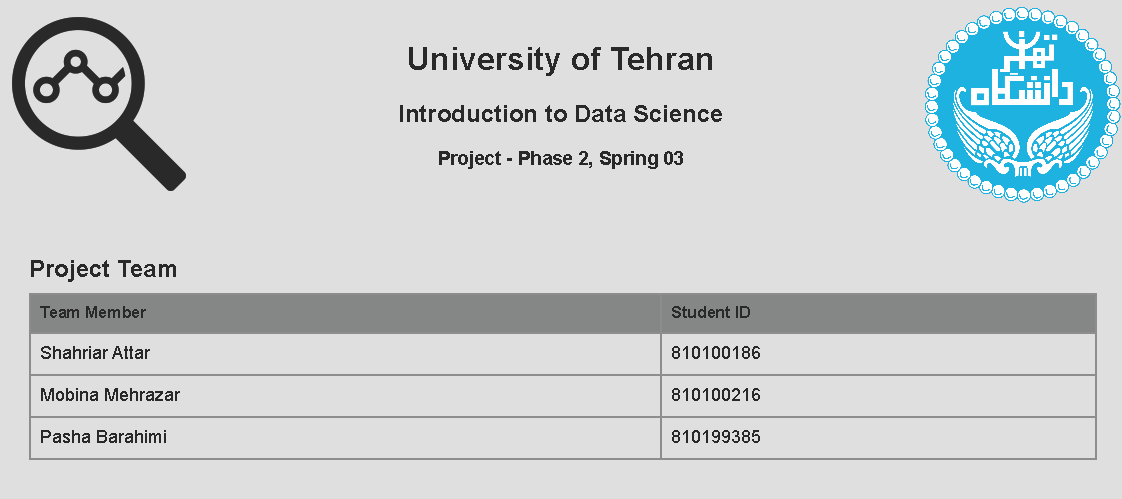

# Project - Phase 2 - Regression Analysis

## Introduction

The dataset contains information about car features and their selling price in South Africa. The objective is to predict the selling price of the cars based on the features provided.

## Objectives

The purpose of this phase is as follows:

1. To build a machine learning model that predicts the selling price of the cars based on the features provided.

## Tasks

- Preprocessing (if necessary)
- Feature Engineering and Selection
- Dimensionality Reduction
- Defining Evaluation Metrics
- Model Training Using 3 Different Models
- Feature Analysis
- Overall Report and Discussions

## Environment Setup

We'll begin by setting up your Python environment and installing the necessary libraries.

In [1]:
import warnings

from typing import Union, Optional, Type

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm

import tabulate

from colorama import Fore

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, ParameterGrid
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, LearningRateScheduler

In [2]:
warnings.filterwarnings('ignore')

In [3]:
PROCESSED_DATA_PATH = "../data/cars_processed.csv"

TRAIN_SIZE = 0.8
VALIDATION_SIZE = 0.1
RANDOM_STATE = 42

## Steps

### Loading the Data

In [4]:
df = pd.read_csv(PROCESSED_DATA_PATH)
df

,Age,Body Type_Bus,Body Type_Cabriolet,Body Type_Coupe,Body Type_Crossover (SUV),Body Type_Hatchback,Body Type_Multi Purpose Vehicle,Body Type_Other,Body Type_Sedan,Body Type_Sports Utility Vehicle (SUV),...,Mileage,No of Cylinders,No of Doors,No of Seats,Remaining Maintenance Plan,Remaining Warranty,Spare Key,Transmission,Vehicle Service History,Price
0,5,False,False,False,False,False,True,False,False,False,...,125000,4,5,7,0,0,False,0,3,767900
1,5,False,False,False,False,False,False,False,False,True,...,65871,4,5,5,0,0,False,0,0,767900
2,9,False,False,False,False,False,False,False,False,True,...,142000,6,5,7,0,0,False,0,3,766900
3,4,False,False,False,False,False,False,False,False,True,...,59000,4,5,5,367,367,True,0,0,765900
4,5,False,False,False,False,False,False,False,False,True,...,86000,6,5,4,0,0,True,0,0,764900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4969,16,False,False,False,False,True,False,False,False,False,...,209000,4,5,4,0,0,False,1,4,29900
4970,19,False,False,False,False,True,False,False,False,False,...,211000,4,3,4,0,0,False,1,4,38900
4971,20,False,False,False,False,True,False,False,False,False,...,310165,4,5,5,0,0,False,1,4,29900
4972,19,False,False,False,False,False,False,False,True,False,...,150788,4,4,5,0,0,False,0,4,25900


### Preprocessing

In the previous section (EDA), we were asked to perform various data preprocessing operations as needed in the data analysis stages. In this section, we'll perform these operations with a machine learning algorithms approach **(Note: if we have already completed the following steps in the previous phase, there is no need to repeat them here).**

**We should explain our reasons for choosing the steps we took in preprocessing.**

Most of the preprocessing steps are done in the previous phase. However, there are some additional steps that we need to take in this phase.

#### Converting Boolean Features to Binary

This step is not necessary as in the scaling step, these features will be converted to binary. However, we can convert them to binary in this step explicitly.

In [5]:
bool_features = df.select_dtypes(include=[bool]).columns
for col in bool_features:
    df[col] = df[col].astype(int)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4974 entries, 0 to 4973
Data columns (total 49 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Age                                     4974 non-null   int64  
 1   Body Type_Bus                           4974 non-null   int32  
 2   Body Type_Cabriolet                     4974 non-null   int32  
 3   Body Type_Coupe                         4974 non-null   int32  
 4   Body Type_Crossover (SUV)               4974 non-null   int32  
 5   Body Type_Hatchback                     4974 non-null   int32  
 6   Body Type_Multi Purpose Vehicle         4974 non-null   int32  
 7   Body Type_Other                         4974 non-null   int32  
 8   Body Type_Sedan                         4974 non-null   int32  
 9   Body Type_Sports Utility Vehicle (SUV)  4974 non-null   int32  
 10  Body Type_Station Wagon                 4974 non-null   int3

#### Splitting the Data into Features and Target

We need to split the data into features and target variables. The target variable is the selling price of the cars, and the features are the remaining columns except for the `Finance Price` column which has a high correlation with the target variable.

In [7]:
X = df.drop(columns=["Price", "Finance Price"])
y = df[["Price"]]

#### Scaling the Features

We need to scale the features to ensure that all features contribute equally to the result. If we don't scale the features, the model may give more weight to features with higher values which may lead to a poor model and slower convergence. We can use the `StandardScaler` class from the `sklearn.preprocessing` module to scale the features.

In [8]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled

,Age,Body Type_Bus,Body Type_Cabriolet,Body Type_Coupe,Body Type_Crossover (SUV),Body Type_Hatchback,Body Type_Multi Purpose Vehicle,Body Type_Other,Body Type_Sedan,Body Type_Sports Utility Vehicle (SUV),...,Make Model,Mileage,No of Cylinders,No of Doors,No of Seats,Remaining Maintenance Plan,Remaining Warranty,Spare Key,Transmission,Vehicle Service History
0,0.20,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.608696,0.368006,0.333333,0.666667,0.8,0.000000,0.00000,0.0,0.0,0.75
1,0.20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.478261,0.191736,0.333333,0.666667,0.4,0.000000,0.00000,0.0,0.0,0.00
2,0.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.608696,0.418684,1.000000,0.666667,0.8,0.000000,0.00000,0.0,0.0,0.75
3,0.15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.459627,0.171253,0.333333,0.666667,0.4,0.824719,0.51257,1.0,0.0,0.00
4,0.20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.124224,0.251742,1.000000,0.666667,0.2,0.000000,0.00000,1.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4969,0.75,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.428571,0.618418,0.333333,0.666667,0.2,0.000000,0.00000,0.0,1.0,1.00
4970,0.90,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.006211,0.624381,0.333333,0.000000,0.2,0.000000,0.00000,0.0,1.0,1.00
4971,0.95,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.900621,0.920002,0.333333,0.666667,0.4,0.000000,0.00000,0.0,1.0,1.00
4972,0.90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.434783,0.444882,0.333333,0.333333,0.4,0.000000,0.00000,0.0,0.0,1.00


#### Scaling the Target

As the target variable is the price of the cars and it contains a wide range of values, we need to scale it to make the training process easier for the model.

In [9]:
y_scaler = MinMaxScaler()
y_scaled = y_scaler.fit_transform(y)
y = pd.DataFrame(y_scaled, columns=y.columns)
y

,Price
0,0.971576
1,0.971576
2,0.970284
3,0.968992
4,0.967700
...,...
4969,0.018088
4970,0.029716
4971,0.018088
4972,0.012920


### Feature Engineering and Selection

Based on the nature of our data, we'll apply specific feature engineering techniques to enhance the quality of our features. We may change these techniques after we check the performance of our models, to improve the metrics. Also, we may decide to select only specific features among all of our features for the next steps.

**We should explain our criterion and the reasons for the techniques we used in feature engineering and selection.**

We'll use the Profile Report shown in the previous phase to guide us in this step.

#### Constants

##### Body Type_Cabriolet

As the report shows, this feature is constant and has no predictive power. We'll drop this feature.

In [10]:
X_scaled.value_counts("Body Type_Cabriolet")

Body Type_Cabriolet
0.0    4974
Name: count, dtype: int64

#### Correlation

Let's plot the correlation matrix for the features that have warning signs in the report.

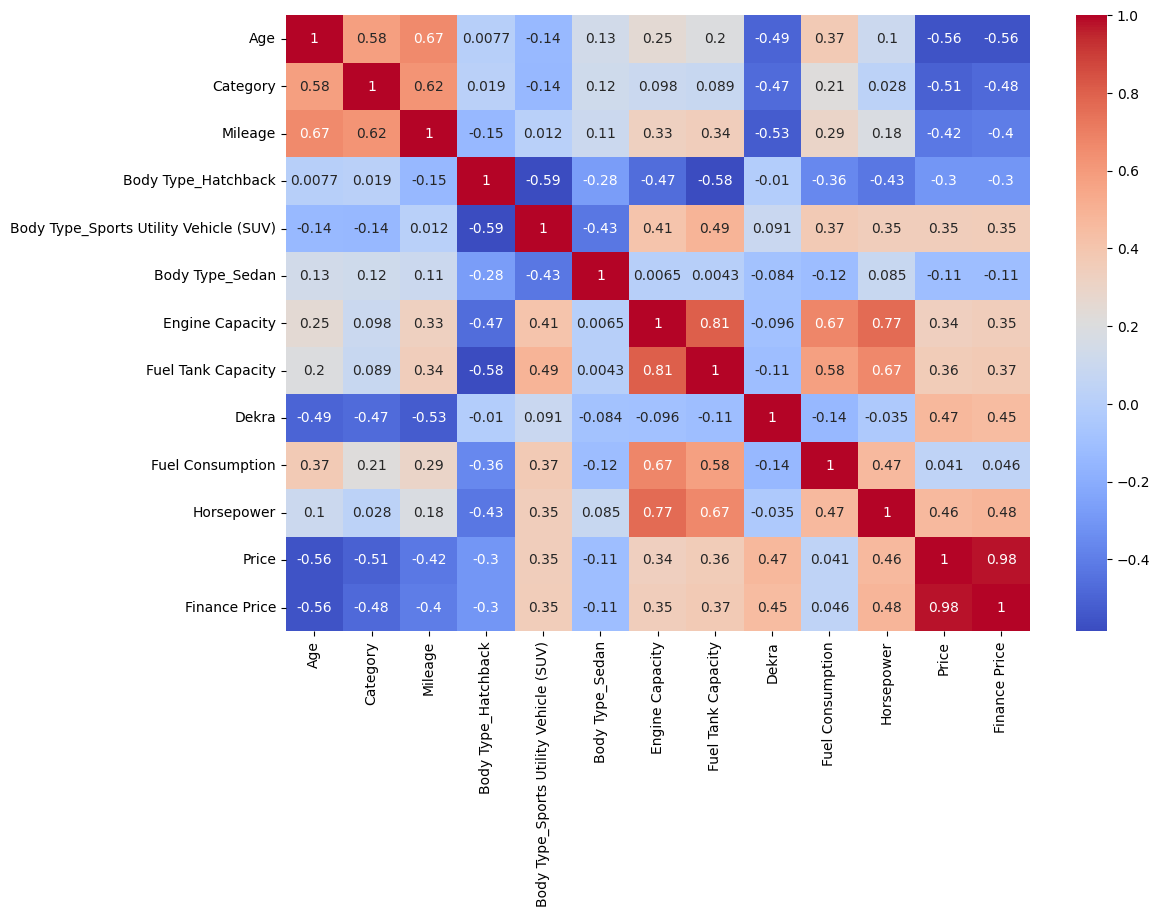

In [11]:
cols = ["Age", "Category", "Mileage", "Body Type_Hatchback", "Body Type_Sports Utility Vehicle (SUV)",
        "Body Type_Sedan", "Engine Capacity", "Fuel Tank Capacity", "Dekra", "Fuel Consumption", "Horsepower"]

df_temp = X_scaled[cols]
df_temp["Price"] = df["Price"]
df_temp["Finance Price"] = df["Finance Price"]
corr = df_temp.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

##### Fuel Consumption

This feature has a low correlation with the target variable and has a high correlation with the other features. We'll drop this feature.

In [12]:
X_scaled = X_scaled.drop(columns=["Fuel Consumption"])

### Dimensionality Reduction

#### PCA

Using the PCA method, we'll reduce the dimensions of numerical features to two dimensions. How much of the initial data variance is transferred to the new space? If we aim to retain 95% of the original variance, what is the minimum number of dimensions required in the new space? **We'll save both the original data and the dimension-reduced one for the next parts.**

Let's remove the One-Hot Encoded features from the dataset before applying PCA. This is because these features are too many and they are very imbalance which will affect the PCA results. Also, we'll remove the Make Model feature as it should have been One-Hot Encoded but it was not.

In [13]:
cols = [col for col in X_scaled.columns if "_" in col]
cols

['Body Type_Bus',
 'Body Type_Cabriolet',
 'Body Type_Coupe',
 'Body Type_Crossover (SUV)',
 'Body Type_Hatchback',
 'Body Type_Multi Purpose Vehicle',
 'Body Type_Other',
 'Body Type_Sedan',
 'Body Type_Sports Utility Vehicle (SUV)',
 'Body Type_Station Wagon',
 'Colour_Black',
 'Colour_Blue',
 'Colour_Gold',
 'Colour_Grey',
 'Colour_Other',
 'Colour_Red',
 'Colour_Silver',
 'Colour_White',
 'Cylinder Layout_I',
 'Cylinder Layout_Other',
 'Cylinder Layout_V',
 'Feature_Auto stop-start',
 'Feature_CarPlay or Android Auto',
 'Feature_Reverse camera',
 'Fuel Type_Diesel',
 'Fuel Type_Hybrid',
 'Fuel Type_Petrol']

In [14]:
X_reduced = X_scaled.drop(columns=cols)

In [15]:
X_reduced = X_reduced.drop(columns=["Make Model"])

In [16]:
X_reduced.shape[1]

18

##### Two Dimensions

In [17]:
pca = PCA(n_components=2, random_state=RANDOM_STATE)
X_pca = pca.fit_transform(X_reduced)
print(f"Explained variance: {pca.explained_variance_ratio_.sum()}")

Explained variance: 0.5195091358983052


As we can see from the explained variance ratio, the first two components explain 51.9% of the variance.

##### 95% Variance

In [18]:
pca = PCA(n_components=0.95, random_state=RANDOM_STATE)
X_pca = pca.fit_transform(X_reduced)
print(f"Number of components: {pca.n_components_}")
print(f"Explained variance: {pca.explained_variance_ratio_.sum()}")

Number of components: 10
Explained variance: 0.9516127012327739


As we can see, we can use almost half of the features to retain 95% of the variance. We'll use the PCA result in the following steps.

In [19]:
X_pca = pd.DataFrame(X_pca, columns=[f"PC{i}" for i in range(1, pca.n_components_ + 1)])
X_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4974 entries, 0 to 4973
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PC1     4974 non-null   float64
 1   PC2     4974 non-null   float64
 2   PC3     4974 non-null   float64
 3   PC4     4974 non-null   float64
 4   PC5     4974 non-null   float64
 5   PC6     4974 non-null   float64
 6   PC7     4974 non-null   float64
 7   PC8     4974 non-null   float64
 8   PC9     4974 non-null   float64
 9   PC10    4974 non-null   float64
dtypes: float64(10)
memory usage: 388.7 KB


### Evaluation Metrics

We will choose appropriate evaluation metrics based on the nature of the data and the project goal, and explain our reasons for choosing them.

As our problem is a regression problem, we'll use the following metrics:

- Mean Squared Error (MSE)
- R-squared (R2)

We could have also used other metrics such as Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE).

These metrics are calculated using `sklearn.metrics`.

### Model Training

In this section, we need to implement three methods to predict our target variable. First, we'll split the initial data (including all features) into training and test sets. This is done for both the original data and the dimension-reduced data. Also, we'll split the training set into training and validation sets to tune the hyperparameters of the models.

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=TRAIN_SIZE, random_state=RANDOM_STATE)
X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(X_pca, y, train_size=TRAIN_SIZE, random_state=RANDOM_STATE)

X_train_grid, X_val, y_train_grid, y_val = train_test_split(X_train, y_train, test_size=VALIDATION_SIZE, random_state=RANDOM_STATE)
X_pca_train_grid, X_pca_val, y_pca_train_grid, y_pca_val = train_test_split(X_pca_train, y_train, test_size=VALIDATION_SIZE, random_state=RANDOM_STATE)

In [21]:
print(X_train.shape, X_test.shape)
print(X_pca_train.shape, X_pca_test.shape)

print(X_train_grid.shape, X_val.shape)
print(X_pca_train_grid.shape, X_pca_val.shape)

(3979, 46) (995, 46)
(3979, 10) (995, 10)
(3581, 46) (398, 46)
(3581, 10) (398, 10)


In [22]:
class RegressionResults:
    def __init__(self, y_true: np.ndarray, y_pred: np.ndarray, is_train: bool = True):
        self.y_true = y_true
        self.y_pred = y_pred
        self.mse = mean_squared_error(y_true, y_pred)
        self.r2 = r2_score(y_true, y_pred)
        self.is_train = is_train

    def __str__(self):
        return f"MSE: {self.mse:.3f}, R2: {self.r2:.3f}"

    def __repr__(self):
        return self.__str__()

Let's write a class to generalize the model training and evaluation process.

In [23]:
class RegressionModel:
    def __init__(self,
                 model: Union[SVR, LinearRegression, RandomForestRegressor, GradientBoostingRegressor, KNeighborsRegressor, DecisionTreeRegressor, keras.Model],
                 X_train: np.ndarray,
                 y_train: np.ndarray,
                 X_test: np.ndarray,
                 y_test: np.ndarray,
                 name: str):
        self.model = model
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.name = name
        self.train_results = None
        self.test_results = None

    def fit(self) -> None:
        self.model.fit(self.X_train, self.y_train)

    def predict(self) -> None:
        y_train_pred = self.model.predict(self.X_train)
        y_test_pred = self.model.predict(self.X_test)
        self.y_train_pred = y_train_pred.reshape(-1, 1)
        self.y_test_pred = y_test_pred.reshape(-1, 1)
        self.train_results = RegressionResults(self.y_train, y_train_pred)
        self.test_results = RegressionResults(self.y_test, y_test_pred)

    def fit_and_predict(self) -> None:
        self.fit()
        self.predict()

    def reverse_scale(self, scaler: MinMaxScaler) -> None:
        self.y_train = scaler.inverse_transform(self.y_train)
        self.y_test = scaler.inverse_transform(self.y_test)
        self.y_train_pred = scaler.inverse_transform(self.y_train_pred)
        self.y_test_pred = scaler.inverse_transform(self.y_test_pred)

    def __str__(self):
        return f"{self.name}:\n\tTrain: {self.train_results}\n\tTest: {self.test_results}"

    def __repr__(self):
        return self.__str__()

    def plot(self) -> None:
        _, ax = plt.subplots(1, 2, figsize=(12, 6))
        ax[0].scatter(self.y_train, self.y_train_pred)
        ax[0].set_title(f"{self.name} Train")
        ax[1].scatter(self.y_test, self.y_test_pred)
        ax[1].set_title(f"{self.name} Test")
        for a in ax:
            a.set_xlabel("True")
            a.set_ylabel("Predicted")
            a.plot([0, 1], [0, 1], transform=a.transAxes, ls="--", c="red")
            for label in a.get_xticklabels():
                label.set_rotation(45)
        plt.show()

For each model, we will use the scaled target to increase the performance of the model. Then, we'll use the `inverse_transform` method to get the original values before plotting the results. This will increase the error as the range of the target variable is wide. However, the R2 score **will not be affected** by this transformation.

As the Neural Network model has different parameters and an additional plot, we'll override some methods in the class for this model.

In [77]:
class NNRegressionModel(RegressionModel):
    def __init__(
        self,
        model: keras.Model,
        X_train: np.ndarray,
        y_train: np.ndarray,
        X_test: np.ndarray,
        y_test: np.ndarray,
        name: str,
    ):
        super().__init__(model, X_train, y_train, X_test, y_test, name)
        self.history = None

    def fit(
        self,
        epochs: int,
        batch_size: int,
        validation_split: float,
        lr_scheduler: Optional[LearningRateScheduler],
        verbose: int = 0,
    ) -> None:
        history = self.model.fit(
            self.X_train,
            self.y_train,
            epochs=epochs,
            batch_size=batch_size,
            validation_split=validation_split,
            callbacks=[EarlyStopping(patience=8), lr_scheduler],
        )
        self.history = history

    def predict(self, verbose: int = 0) -> None:
        y_train_pred = self.model.predict(self.X_train, verbose=verbose)
        y_test_pred = self.model.predict(self.X_test, verbose=verbose)
        self.y_train_pred = y_train_pred
        self.y_test_pred = y_test_pred
        self.train_results = RegressionResults(self.y_train, y_train_pred, is_train=True)
        self.test_results = RegressionResults(self.y_test, y_test_pred, is_train=False)

    def fit_and_predict(
        self,
        epochs: int = 100,
        batch_size: int = 32,
        validation_split: float = 0.2,
        lr_scheduler: Optional[LearningRateScheduler] = LearningRateScheduler(lambda epoch: 1e-3 * 0.9**epoch),
        verbose: int = 0,
    ) -> None:
        self.fit(
            epochs=epochs,
            batch_size=batch_size,
            validation_split=validation_split,
            lr_scheduler=lr_scheduler,
            verbose=verbose,
        )
        self.predict(verbose=verbose)

    def plot(self) -> None:
        super().plot()
        plt.figure(figsize=(12, 6))
        plt.plot(self.history.history["loss"], label="train")
        plt.plot(self.history.history["val_loss"], label="validation")
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.legend()
        plt.title(f"{self.name} Loss")
        plt.show()

We also need a function to tune the hyperparameters of the model and plot the metrics for different hyperparameters. We'll use the `ParameterGrid` class from the `sklearn.model_selection` module to tune the hyperparameters.

In [29]:
def find_best_params(
    model: Type,
    param_grid: dict,
    X_train: np.ndarray,
    y_train: np.ndarray,
    X_val: np.ndarray,
    y_val: np.ndarray,
    plot: bool = True,
) -> dict:
    best_params = {}
    least_loss = np.inf
    results = {param: {} for param in param_grid.keys()}
    for params in tqdm(ParameterGrid(param_grid)):
        model_instance = model(**params)
        model_instance.fit(X_train, y_train)
        y_pred = model_instance.predict(X_val)
        loss = mean_squared_error(y_val, y_pred)
        score = r2_score(y_val, y_pred)
        if loss < least_loss:
            least_loss = loss
            best_params = params

        for key, val in params.items():
            if val not in results[key]:
                results[key][val] = {"loss": np.inf, "score": -np.inf}
            results[key][val]["loss"] = min(results[key][val]["loss"], loss)
            results[key][val]["score"] = max(results[key][val]["score"], score)

    if plot:
        count = sum([len(values.keys()) > 1 for values in results.values()])
        _, ax = plt.subplots(count, 2, figsize=(12, 6 * count))
        for i, (param, values) in enumerate(results.items()):
            if len(values.keys()) < 2:
                continue
            x = list(values.keys())
            y_loss = [v["loss"] for v in values.values()]
            y_score = [v["score"] for v in values.values()]
            ax[i][0].plot(x, y_loss)
            ax[i][0].set_title(f"{param} Loss")
            ax[i][0].set_xlabel(param)
            ax[i][0].set_ylabel("Loss")
            ax[i][1].plot(x, y_score)
            ax[i][1].set_title(f"{param} R2 Score")
            ax[i][1].set_xlabel(param)
            ax[i][1].set_ylabel("Score")

    return best_params

#### Method One: Neural Network

We'll design and train a neural network for our goal. Then we'll report the following:

- Error plot during training
- Model performance on the test data based on the evaluation metric
- The network architecture, loss function, and optimization algorithm we chose, and explain our reasons for choosing them.

In [30]:
def create_nn_model(input_shape: int, output_shape: int) -> keras.Model:
    model = Sequential([
        Input(shape=(input_shape,)),
        Dense(512, activation="relu"),
        Dense(512, activation="relu"),
        Dense(output_shape, activation="relu")
    ])
    adam = Adam(learning_rate=1e-3)
    model.compile(optimizer=adam, loss="mse")
    return model

In [31]:
model = create_nn_model(X_train.shape[1], 1)
nn_model = NNRegressionModel(model, X_train, y_train, X_test, y_test, "Neural Network")
nn_model.fit_and_predict(epochs=50)
nn_model

Epoch 1/50
100/100 [==============================] - 1s 4ms/step - loss: 0.0125 - val_loss: 0.0054 - lr: 0.0010
Epoch 2/50
100/100 [==============================] - 0s 3ms/step - loss: 0.0051 - val_loss: 0.0048 - lr: 9.0000e-04
Epoch 3/50
100/100 [==============================] - 0s 3ms/step - loss: 0.0038 - val_loss: 0.0040 - lr: 8.1000e-04
Epoch 4/50
100/100 [==============================] - 0s 3ms/step - loss: 0.0033 - val_loss: 0.0039 - lr: 7.2900e-04
Epoch 5/50
100/100 [==============================] - 0s 3ms/step - loss: 0.0029 - val_loss: 0.0034 - lr: 6.5610e-04
Epoch 6/50
100/100 [==============================] - 0s 3ms/step - loss: 0.0026 - val_loss: 0.0033 - lr: 5.9049e-04
Epoch 7/50
100/100 [==============================] - 0s 3ms/step - loss: 0.0023 - val_loss: 0.0032 - lr: 5.3144e-04
Epoch 8/50
100/100 [==============================] - 0s 3ms/step - loss: 0.0018 - val_loss: 0.0031 - lr: 4.7830e-04
Epoch 9/50
100/100 [==============================] - 0s 3ms/step - 

Neural Network:
	Train: MSE: 0.001, R2: 0.970
	Test: MSE: 0.004, R2: 0.883

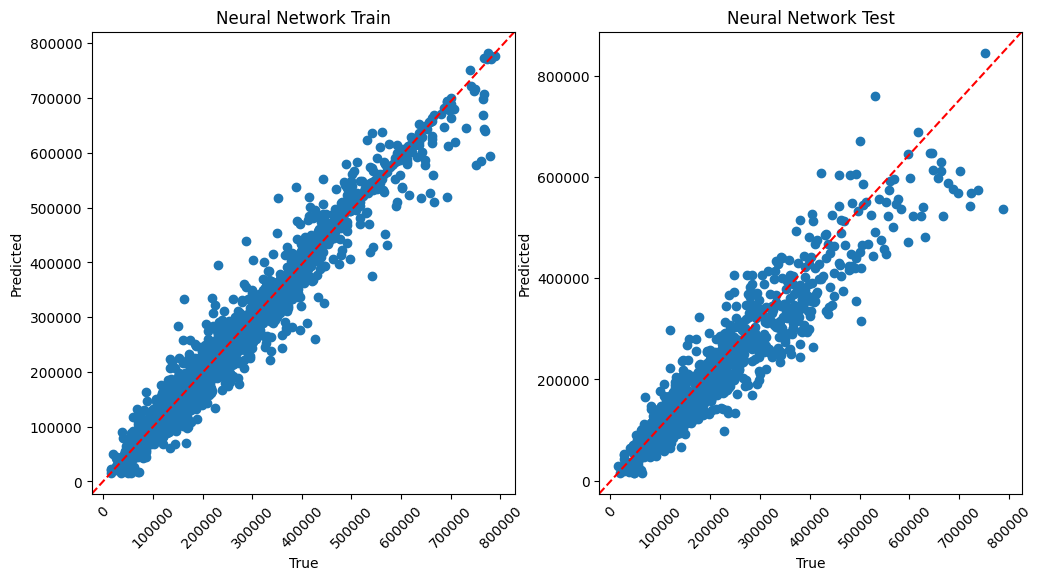

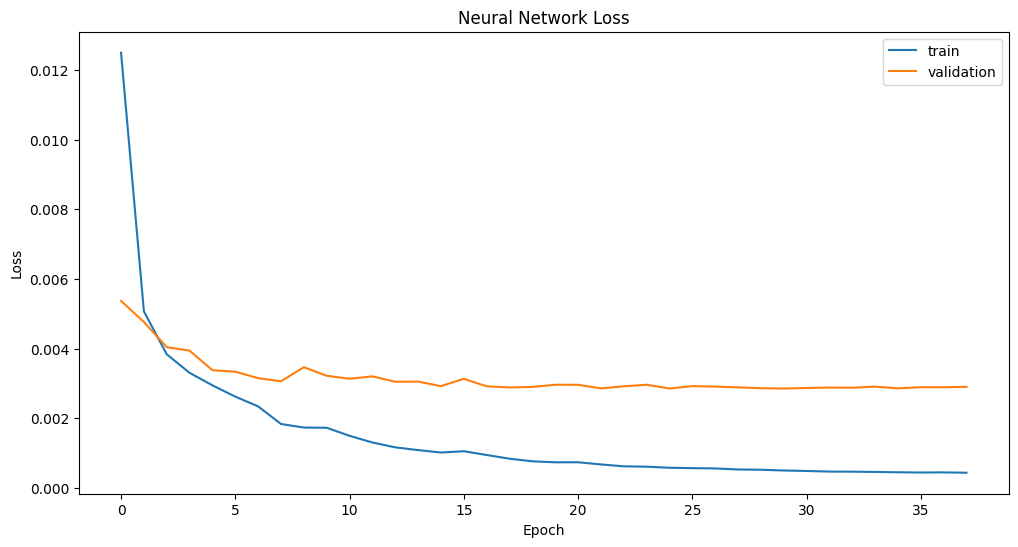

In [32]:
nn_model.reverse_scale(y_scaler)
nn_model.plot()

The neural network architecture is as follows:

- The neural network has two hidden layers with 512 neurons and the ReLU activation function. We chose the ReLU activation function for the hidden layers because it is a good general-purpose activation function. 
- The output layer has one neuron and the ReLU activation function. We chose the ReLU activation function for the output layer because it is a regression problem.
- We used the Adam optimizer with a learning rate of 1e-3. We chose the Adam optimizer because it is an adaptive learning rate optimization algorithm that is well-suited for training neural networks. We chose learning rate of 1e-3 because it is a common learning rate for neural networks and we also used scheduler to decrease the learning rate. Also an early stopping callback is used to prevent overfitting.
- We used the mean squared error (MSE) loss function. We chose the MSE loss function because it is a common loss function for regression problems.

The results show that the model has a good performance on the train and validation sets. The model has a low MSE and a high R2 score on the test set.

#### Methods Two & Three

We should choose two methods from the following based on the problem goals and train the models:

<input type="checkbox" checked> Linear/Logistic Regression<br/>
<input type="checkbox" checked> SVM<br/>
<input type="checkbox" checked> Decision Tree<br/>
<input type="checkbox" checked> KNN<br/>

Additionally, we have chosen the following models:

<input type="checkbox" checked> Random Forest<br/>
<input type="checkbox" checked> Gradient Boosting<br/>

Then we'll report the following:

- Error plot per parameter
- Model performance on the test data based on the evaluation metric
- Model hyperparameters

##### Linear Regression

This method has no hyperparameters to tune.

In [34]:
lr_model = RegressionModel(LinearRegression(), X_train, y_train, X_test, y_test, "Linear Regression")
lr_model.fit_and_predict()
lr_model

Linear Regression:
	Train: MSE: 0.007, R2: 0.765
	Test: MSE: 0.007, R2: 0.772

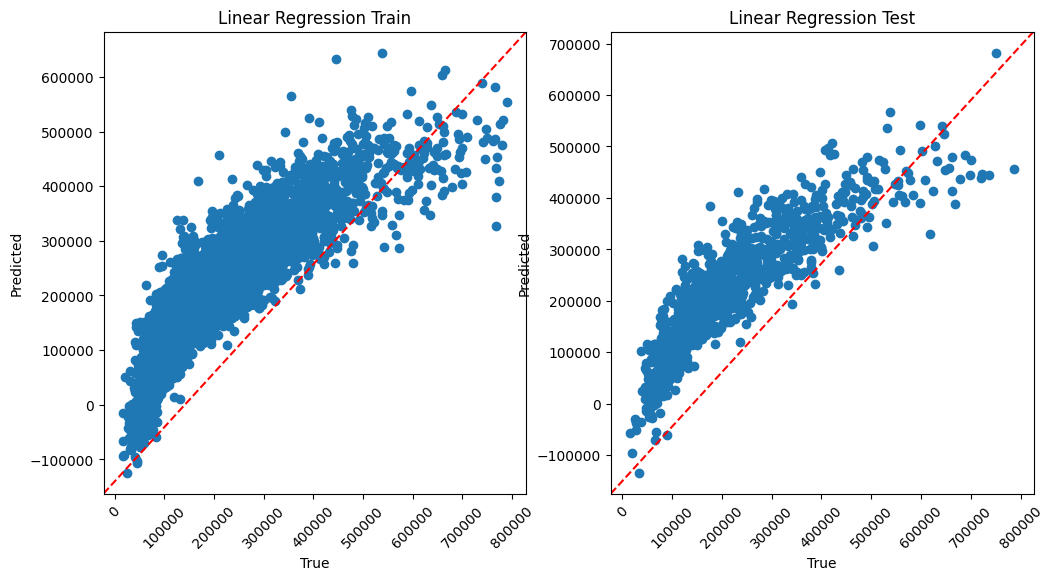

In [35]:
lr_model.reverse_scale(y_scaler)
lr_model.plot()

##### SVM

In [36]:
params = {
    "C": [0.1, 1, 10],
    "epsilon": [0.1, 0.2, 0.3, 0.4, 0.5],
    "kernel": ["linear", "rbf"]
}

100%|██████████| 30/30 [00:02<00:00, 10.16it/s]


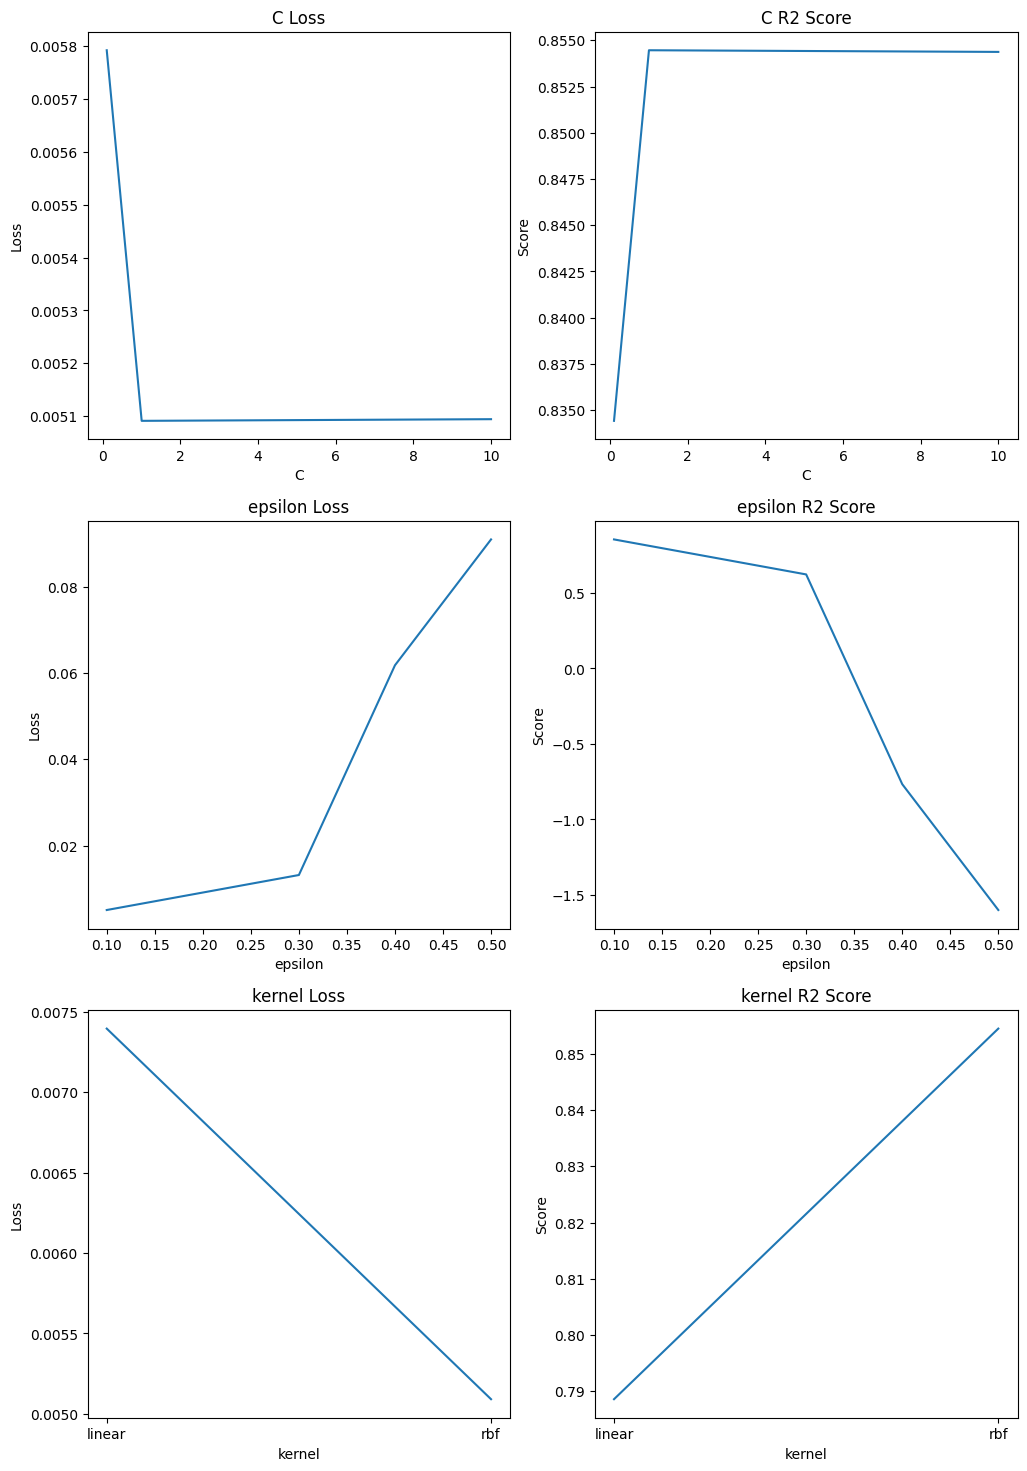

In [37]:
best_params = find_best_params(SVR, params, X_train_grid, y_train_grid, X_val, y_val)

In [38]:
best_params

{'C': 1, 'epsilon': 0.1, 'kernel': 'rbf'}

In [39]:
svm_model = RegressionModel(SVR(**best_params), X_train, y_train, X_test, y_test, "SVM")
svm_model.fit_and_predict()
svm_model

SVM:
	Train: MSE: 0.003, R2: 0.892
	Test: MSE: 0.005, R2: 0.860

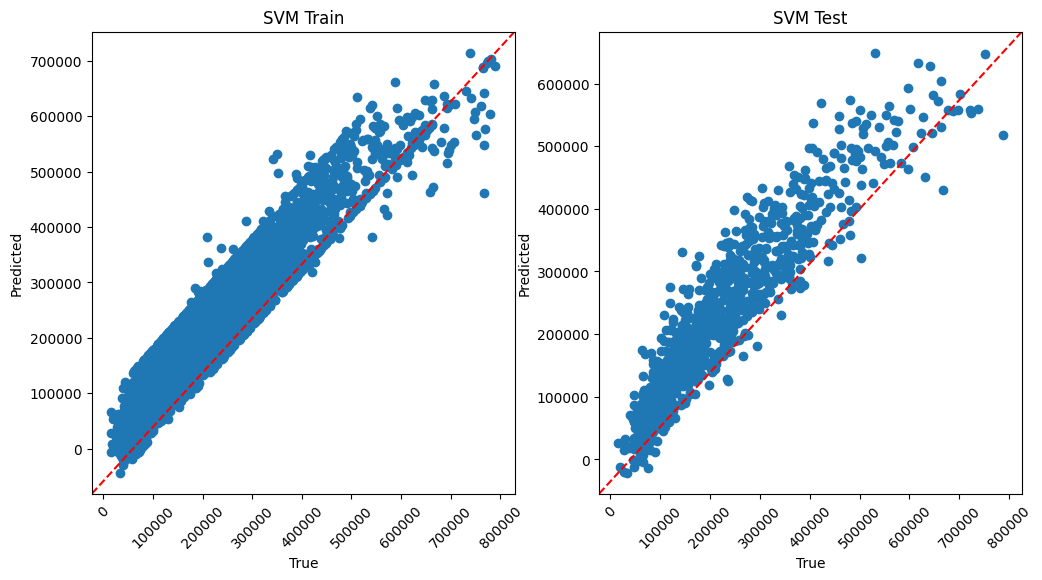

In [40]:
svm_model.reverse_scale(y_scaler)
svm_model.plot()

##### Random Forest

In [41]:
params = {
    "n_estimators": [50, 100, 200],
    "max_depth": [3, 5, 7, 9, None],
    "min_samples_split": [2, 4, 6, 8],
    "random_state": [RANDOM_STATE]
}

100%|██████████| 60/60 [00:59<00:00,  1.00it/s]


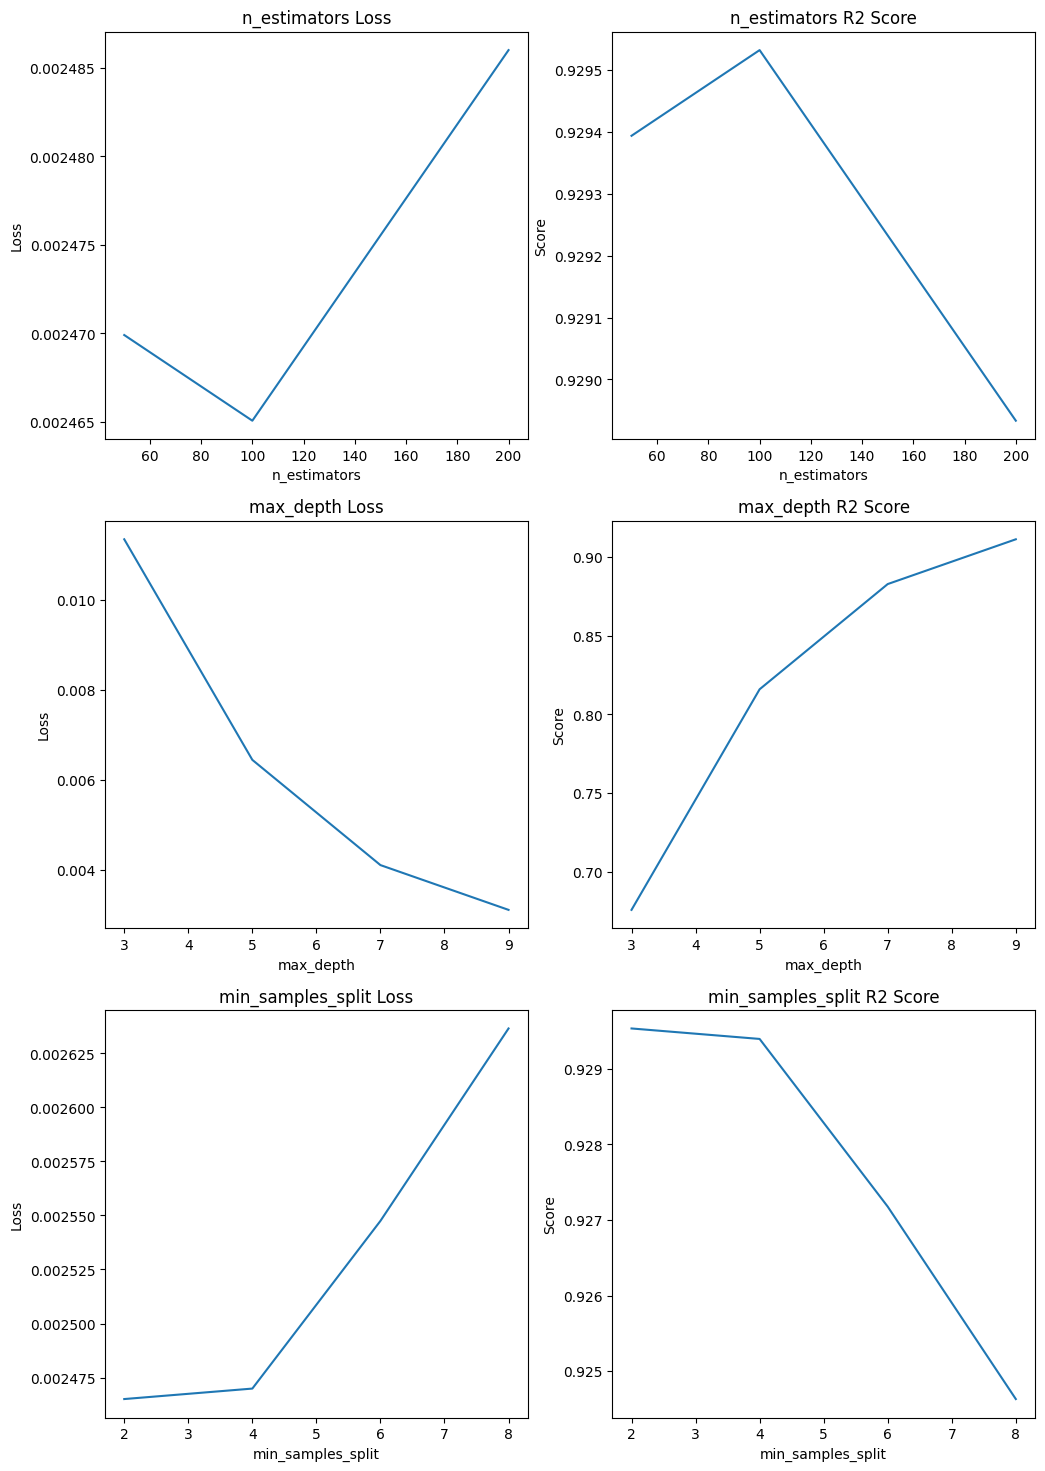

In [42]:
best_params = find_best_params(RandomForestRegressor, params, X_train_grid, y_train_grid, X_val, y_val)

In [43]:
best_params

{'max_depth': None,
 'min_samples_split': 2,
 'n_estimators': 100,
 'random_state': 42}

In [44]:
rf_model = RegressionModel(RandomForestRegressor(**best_params), X_train, y_train, X_test, y_test, "Random Forest")
rf_model.fit_and_predict()
rf_model

Random Forest:
	Train: MSE: 0.000, R2: 0.988
	Test: MSE: 0.003, R2: 0.912

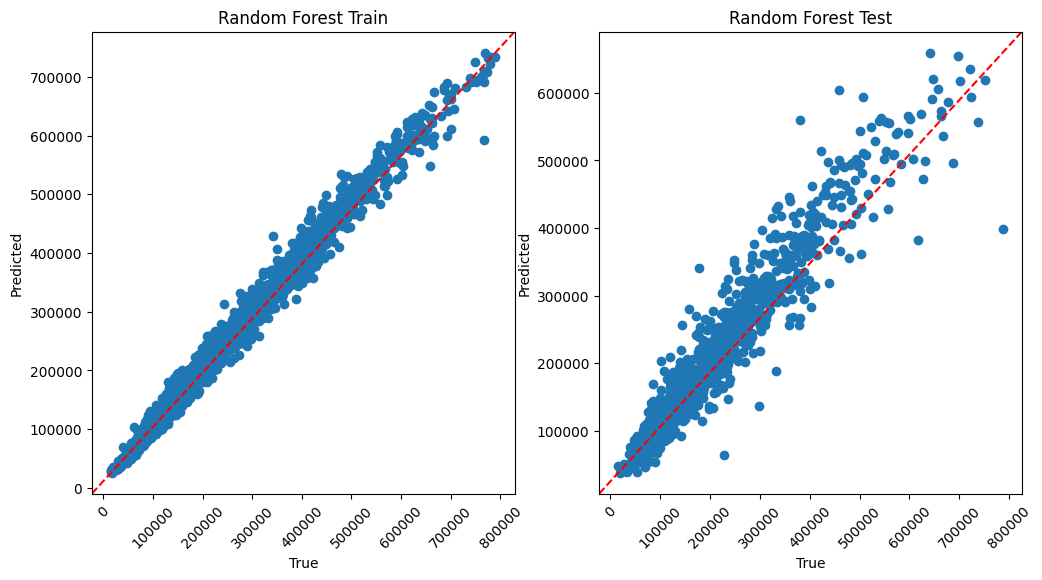

In [45]:
rf_model.reverse_scale(y_scaler)
rf_model.plot()

##### Gradient Boosting

In [46]:
params = {
    "n_estimators": [50, 100, 200],
    "max_depth": [3, 5, 7, 9, None],
    "min_samples_split": [2, 4, 6, 8],
    "random_state": [RANDOM_STATE]
}

100%|██████████| 60/60 [01:35<00:00,  1.59s/it]


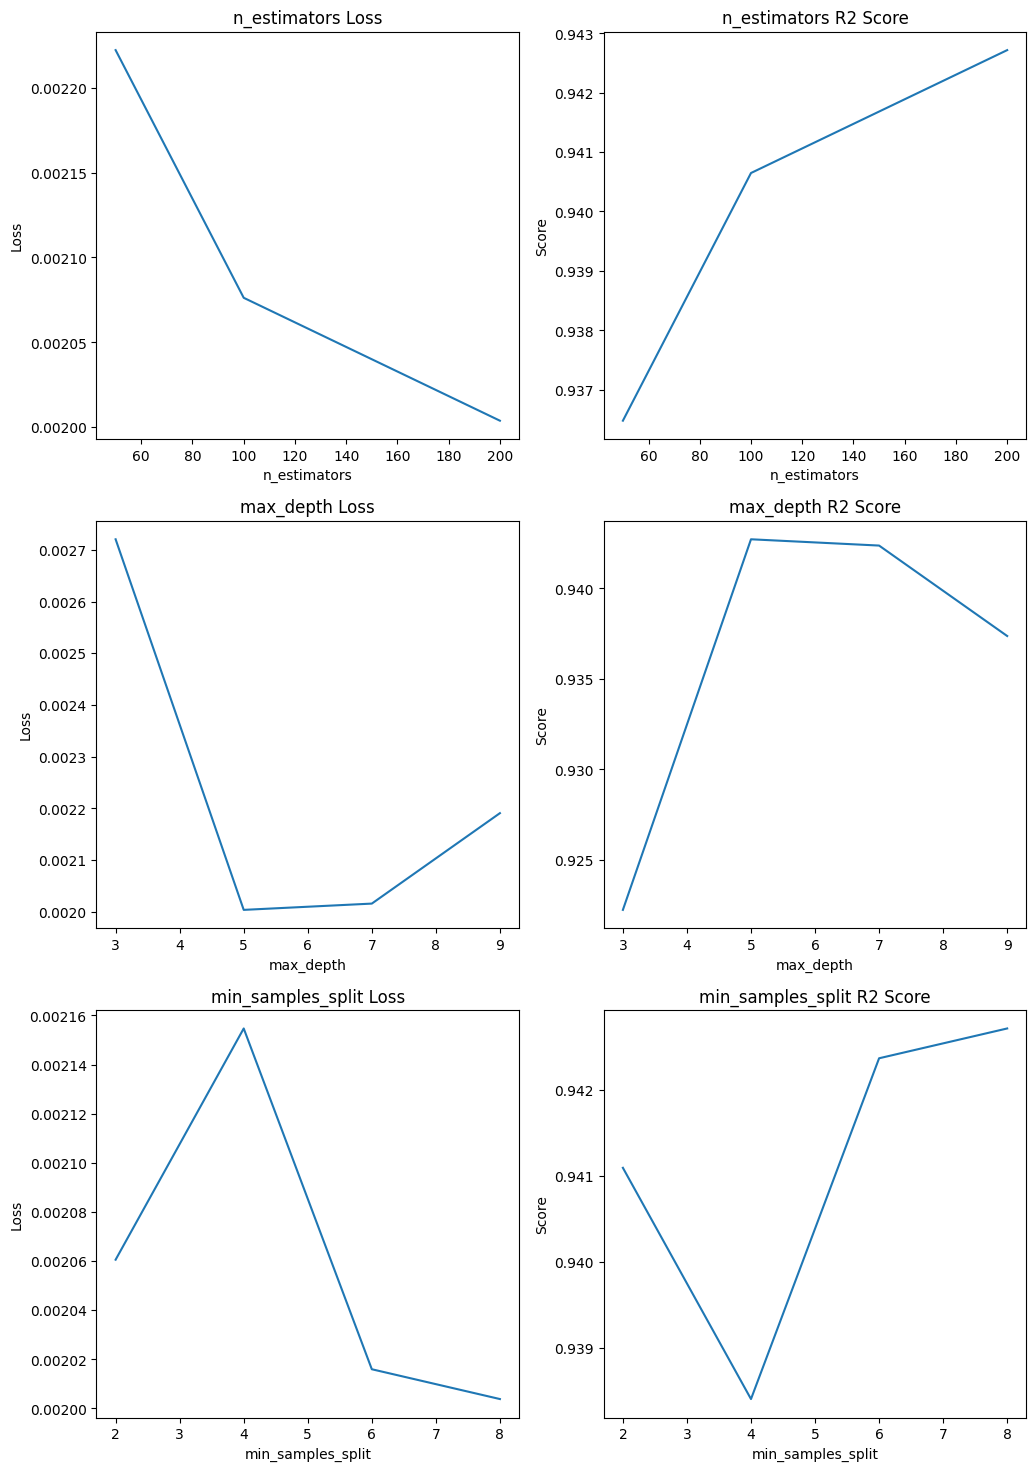

In [47]:
best_params = find_best_params(GradientBoostingRegressor, params, X_train_grid, y_train_grid, X_val, y_val)

In [48]:
best_params

{'max_depth': 5,
 'min_samples_split': 8,
 'n_estimators': 200,
 'random_state': 42}

In [49]:
gb_model = RegressionModel(GradientBoostingRegressor(**best_params), X_train, y_train, X_test, y_test, "Gradient Boosting")
gb_model.fit_and_predict()
gb_model

Gradient Boosting:
	Train: MSE: 0.001, R2: 0.980
	Test: MSE: 0.002, R2: 0.932

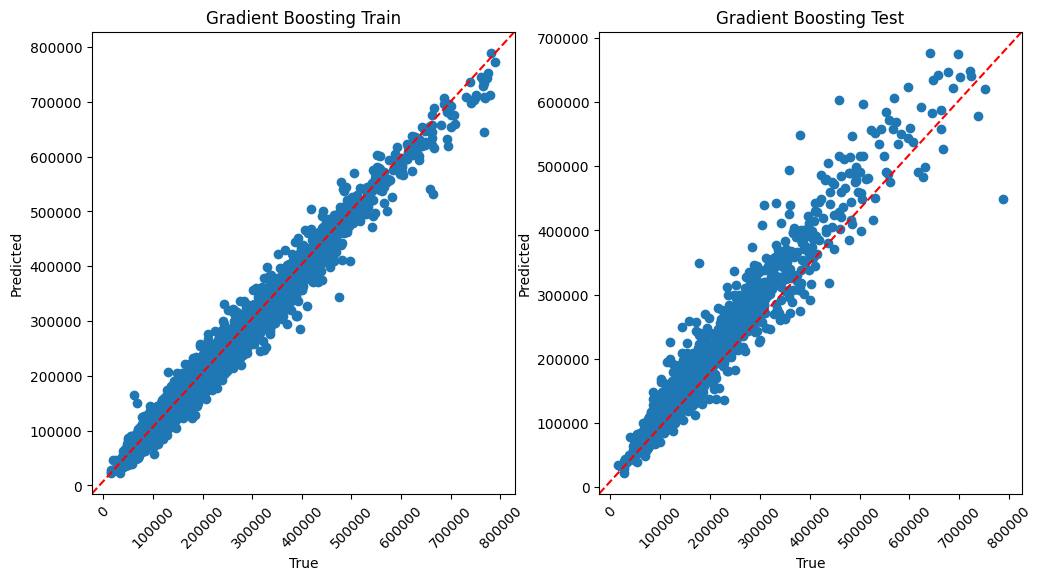

In [50]:
gb_model.reverse_scale(y_scaler)
gb_model.plot()

##### KNN

In [51]:
params = {
    "n_neighbors": [3, 5, 7, 9],
    "weights": ["uniform", "distance"],
    "algorithm": ["auto", "ball_tree", "kd_tree", "brute"]
}

100%|██████████| 32/32 [00:01<00:00, 19.90it/s]


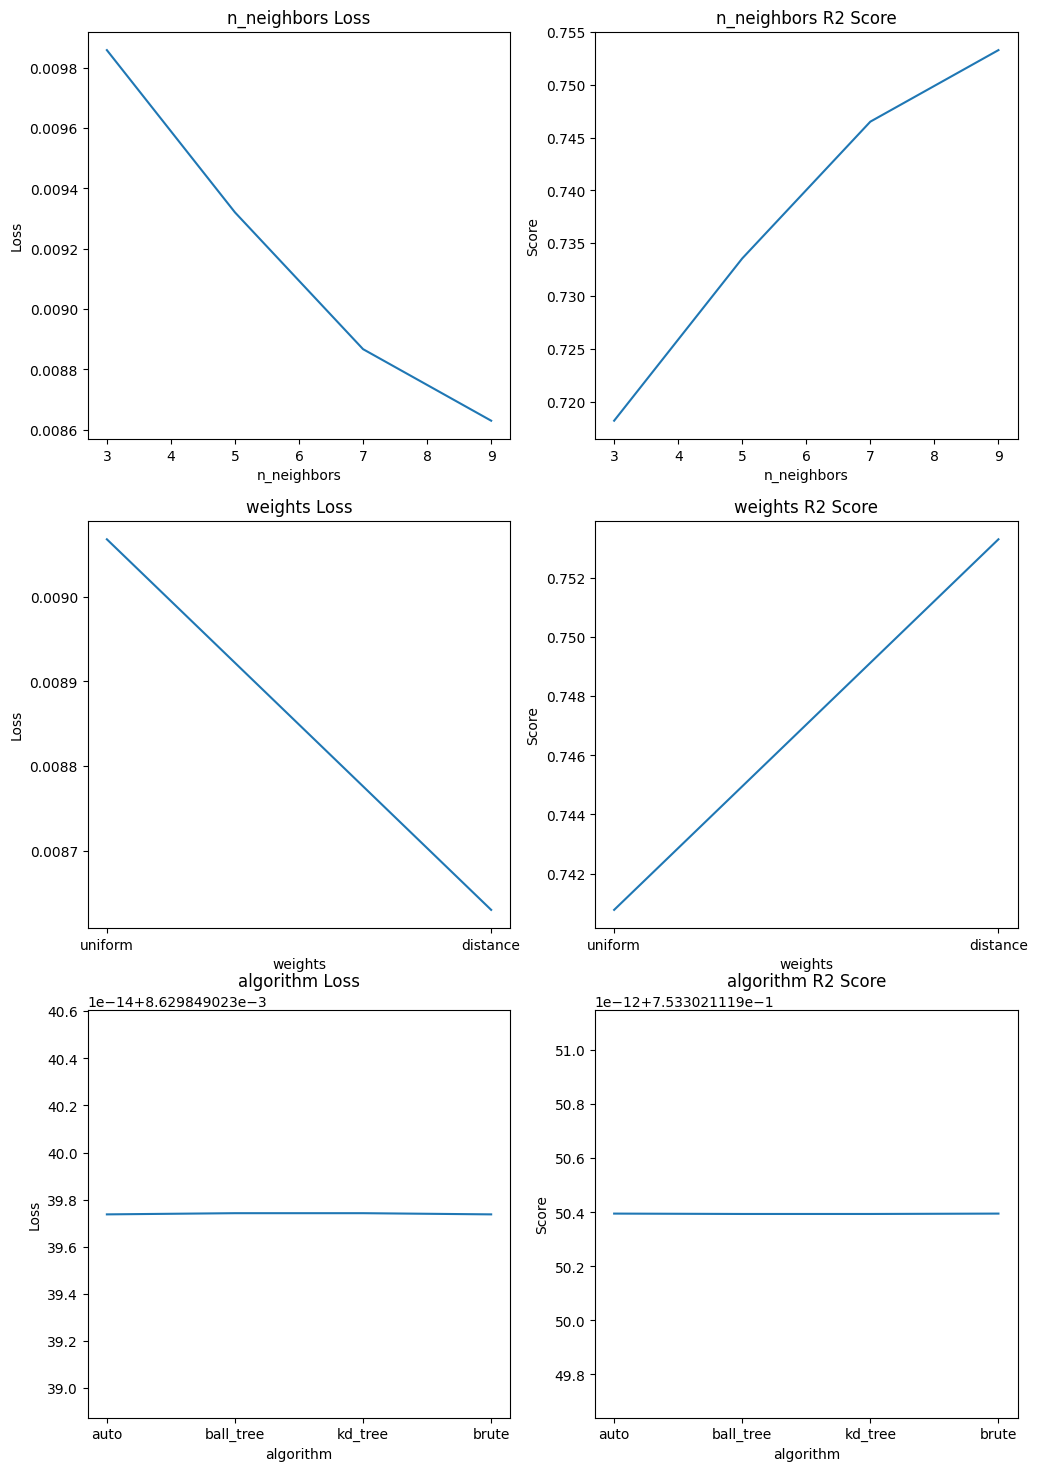

In [52]:
best_params = find_best_params(KNeighborsRegressor, params, X_train_grid, y_train_grid, X_val, y_val)

In [53]:
best_params

{'algorithm': 'auto', 'n_neighbors': 9, 'weights': 'distance'}

In [54]:
knn_model = RegressionModel(KNeighborsRegressor(**best_params), X_train, y_train, X_test, y_test, "KNN")
knn_model.fit_and_predict()
knn_model

KNN:
	Train: MSE: 0.000, R2: 1.000
	Test: MSE: 0.009, R2: 0.713

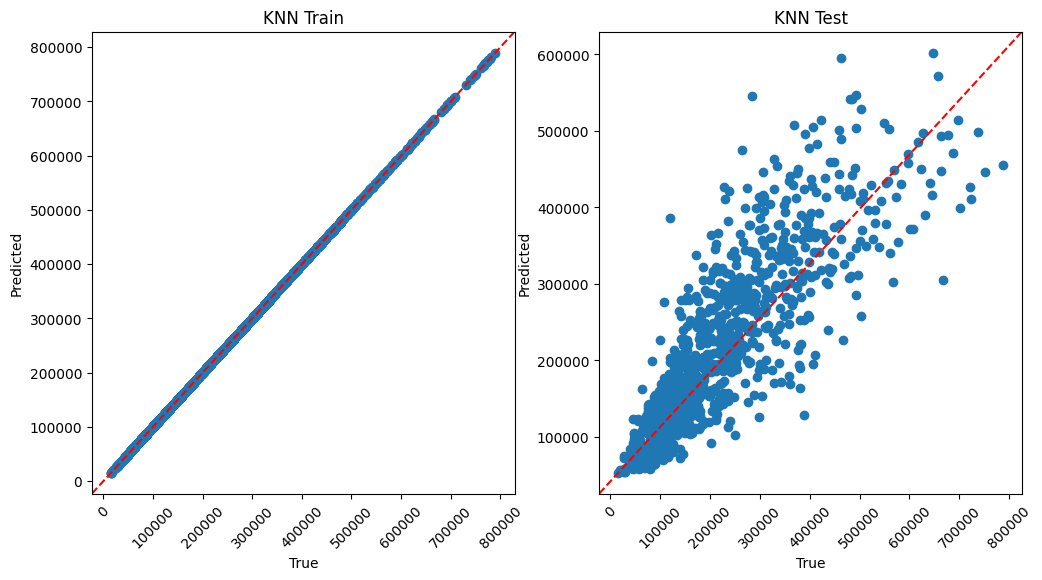

In [55]:
knn_model.reverse_scale(y_scaler)
knn_model.plot()

##### Decision Tree

In [56]:
params = {
    "max_depth": [3, 5, 7, 9, None],
    "min_samples_split": [2, 4, 6, 8],
    "random_state": [RANDOM_STATE]
}

100%|██████████| 20/20 [00:00<00:00, 48.41it/s]


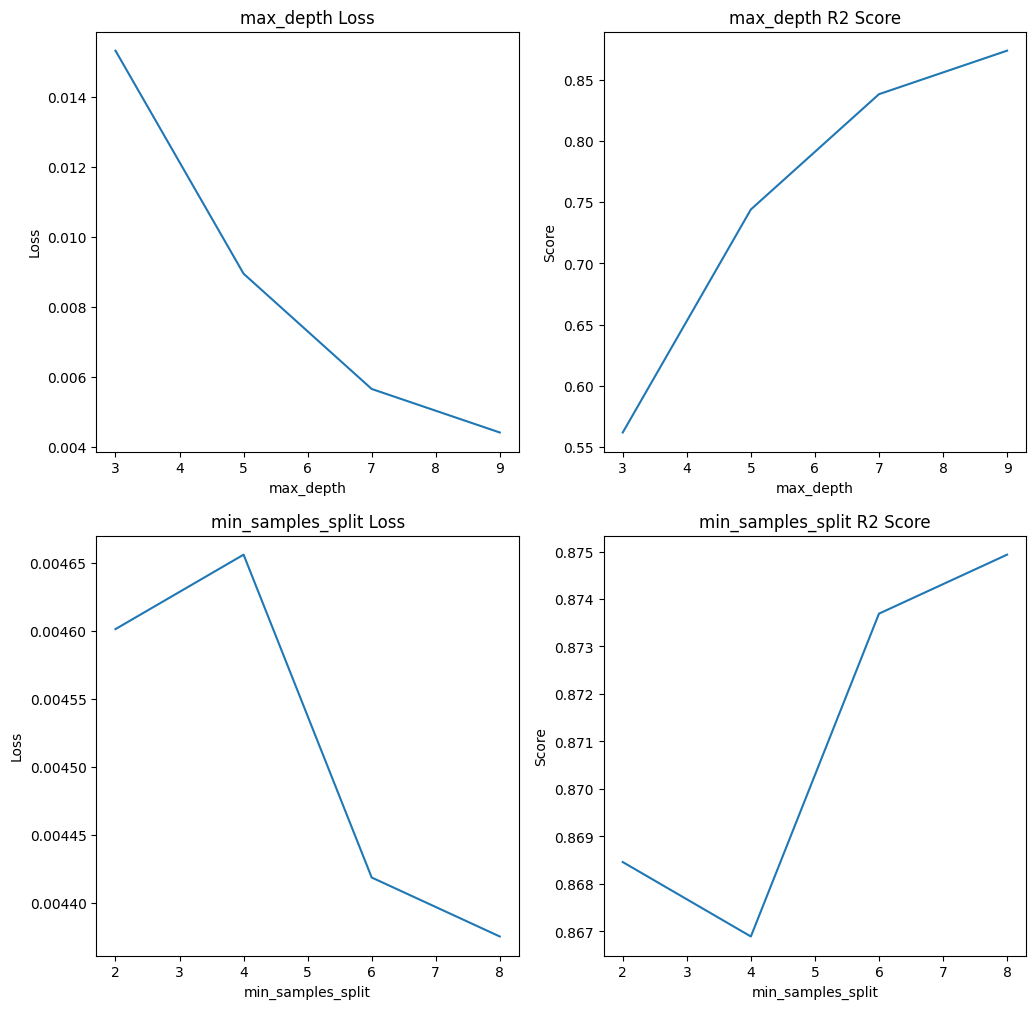

In [57]:
best_params = find_best_params(DecisionTreeRegressor, params, X_train_grid, y_train_grid, X_val, y_val)

In [58]:
best_params

{'max_depth': None, 'min_samples_split': 8, 'random_state': 42}

In [59]:
dt_model = RegressionModel(DecisionTreeRegressor(**best_params), X_train, y_train, X_test, y_test, "Decision Tree")
dt_model.fit_and_predict()
dt_model

Decision Tree:
	Train: MSE: 0.001, R2: 0.977
	Test: MSE: 0.006, R2: 0.827

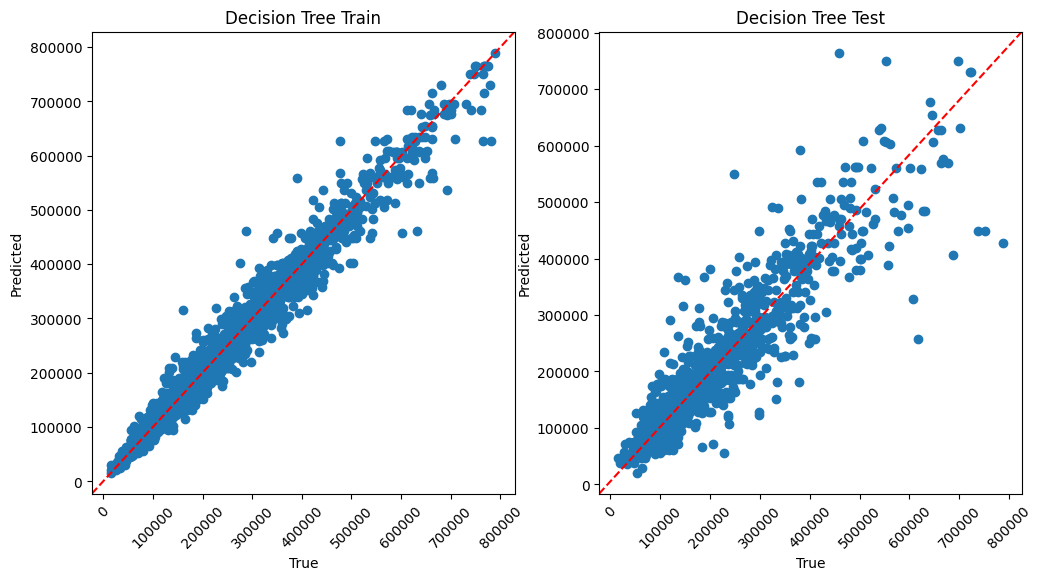

In [60]:
dt_model.reverse_scale(y_scaler)
dt_model.plot()

#### Comparison

Finally, we'll compare the three implemented methods. **Which method performed better? We should our analysis of this comparison.** Note that having 3 models is mandatory for this comparison, and adding more models, based on how this extra information improves the quality of our comparison, has a bonus score.

In [61]:
def print_model_tabulated_results(model: RegressionModel) -> None:
    results = [
        [Fore.YELLOW + "Train" + Fore.RESET, f"{Fore.GREEN if model.train_results.mse < 0.004 else Fore.RED}{model.train_results.mse:.3f}", f"{Fore.GREEN if model.train_results.r2 > 0.9 else Fore.RED}{model.train_results.r2:.3f}{Fore.RESET}"],
        [Fore.YELLOW + "Test" + Fore.RESET, f"{Fore.GREEN if model.test_results.mse < 0.004 else Fore.RED}{model.test_results.mse:.3f}", f"{Fore.GREEN if model.test_results.r2 > 0.9 else Fore.RED}{model.test_results.r2:.3f}{Fore.RESET}"],
    ]
    headers = ["Data", "MSE", "R2"]
    headers = [Fore.CYAN + h + Fore.RESET for h in headers]
    print(tabulate.tabulate(results, headers=headers, tablefmt="pretty"))

In [62]:
def print_all_models_tabulated_results(models: list[RegressionModel]) -> None:
    for model in models:
        print(Fore.BLUE + model.name + Fore.RESET)
        print_model_tabulated_results(model)
        print()

In [63]:
models = [nn_model, lr_model, svm_model, rf_model, gb_model, knn_model, dt_model]
print_all_models_tabulated_results(models)

Neural Network
+-------+-------+-------+
| Data  |  MSE  |  R2   |
+-------+-------+-------+
| Train | 0.001 | 0.970 |
| Test  | 0.004 | 0.883 |
+-------+-------+-------+

Linear Regression
+-------+-------+-------+
| Data  |  MSE  |  R2   |
+-------+-------+-------+
| Train | 0.007 | 0.765 |
| Test  | 0.007 | 0.772 |
+-------+-------+-------+

SVM
+-------+-------+-------+
| Data  |  MSE  |  R2   |
+-------+-------+-------+
| Train | 0.003 | 0.892 |
| Test  | 0.005 | 0.860 |
+-------+-------+-------+

Random Forest
+-------+-------+-------+
| Data  |  MSE  |  R2   |
+-------+-------+-------+
| Train | 0.000 | 0.988 |
| Test  | 0.003 | 0.912 |
+-------+-------+-------+

Gradient Boosting
+-------+-------+-------+
| Data  |  MSE  |  R2   |
+-------+-------+-------+
| Train | 0.001 | 0.980 |
| Test  | 0.002 | 0.932 |
+-------+-------+-------+

KNN
+-------+-------+-------+
| Data  |  MSE  |  R2   |
+-------+-------+-------+
| Train | 0.000 | 1.000 |
| Test  | 0.009 | 0.713 |
+-------+---

Results are presented as follows:

- **Neural Network**: The model performs well on the Train data but it doesn't generalize well on the Test data. The performance of the model on the Test data is not so bad, but it can be improved.
- **Linear Regression**: The model doesn't perform well on the Train data and it doesn't generalize well on the Test data. It shows that the model is underfitting.
- **SVM**: The results are almost the same as the neural network model, while it performs worse on the Train data.
- **Random Forest**: This model performs well on both Train and Test data. It shows that the model is not overfitting or underfitting. It is one of the best models for this dataset and we can use it for further analysis.
- **Gradient Boosting**: This model performs well on both Train and Test data. It shows that the model is not overfitting or underfitting. It is one of the best models for this dataset and we can use it for further analysis.
- **KNN**: This model performs great on the Train data with 100% accuracy. However, it has the worst performance on the Test data. It shows that the model is overfitting.
- **Decision Tree**: This model performs well on the Train data but it doesn't generalize well on the Test data. This shows that the model is overfitting.

### Feature Analysis

We'll train the best-performing method from the previous section using the dimension-reduced data. How did the model performance change? We should provide our analysis.

We'll use the `Random Forest` and `Gradient Boosting` models for this analysis. We'll train the models using the dimension-reduced data and compare the results with the previous models. We will also use the `Neural Network` to check if the model overfits.

#### Random Forest

In [64]:
params = {
    "n_estimators": [50, 100, 200],
    "max_depth": [3, 5, 7, 9, None],
    "min_samples_split": [2, 4, 6, 8],
    "random_state": [RANDOM_STATE]
}

100%|██████████| 60/60 [02:06<00:00,  2.11s/it]


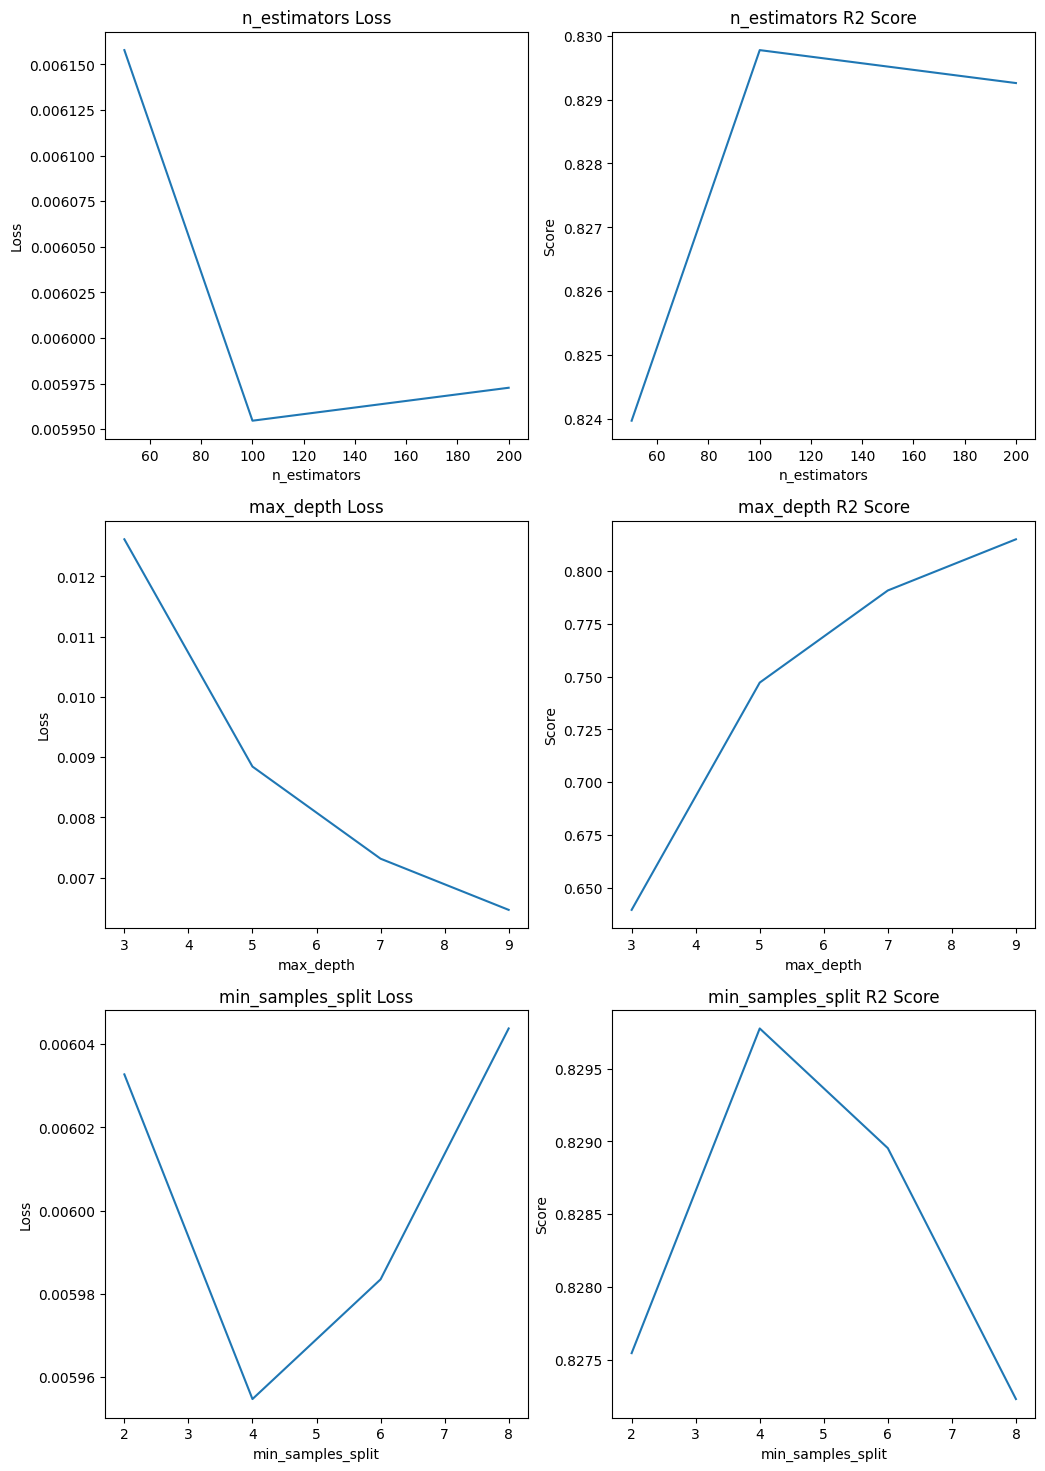

In [65]:
best_params = find_best_params(RandomForestRegressor, params, X_pca_train_grid, y_pca_train_grid, X_pca_val, y_pca_val)

In [66]:
best_params

{'max_depth': None,
 'min_samples_split': 4,
 'n_estimators': 100,
 'random_state': 42}

In [67]:
rf_pca_model = RegressionModel(RandomForestRegressor(**best_params), X_pca_train, y_pca_train, X_pca_test, y_pca_test, "Random Forest PCA")
rf_pca_model.fit_and_predict()
rf_pca_model

Random Forest PCA:
	Train: MSE: 0.001, R2: 0.965
	Test: MSE: 0.006, R2: 0.812

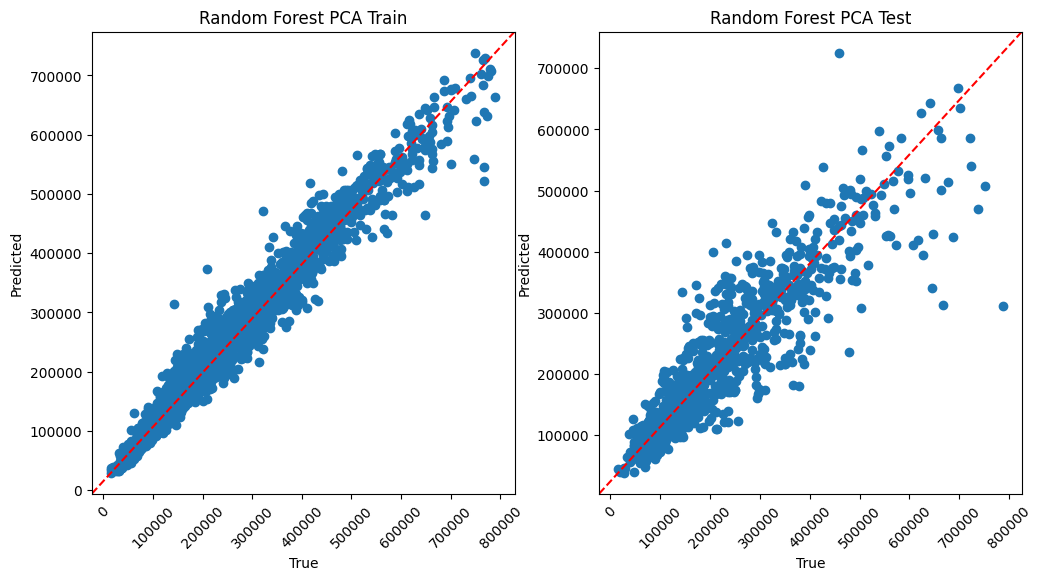

In [68]:
rf_pca_model.reverse_scale(y_scaler)
rf_pca_model.plot()

As we can see, the model performance on the Train data is almost the same as the previous model. However, the model performance on the Test data is worse than the previous model. This shows that the model is overfitting.

#### Gradient Boosting

In [69]:
params = {
    "n_estimators": [50, 100, 200],
    "max_depth": [3, 5, 7, 9, None],
    "min_samples_split": [2, 4, 6, 8],
    "random_state": [RANDOM_STATE]
}

100%|██████████| 60/60 [04:19<00:00,  4.33s/it]


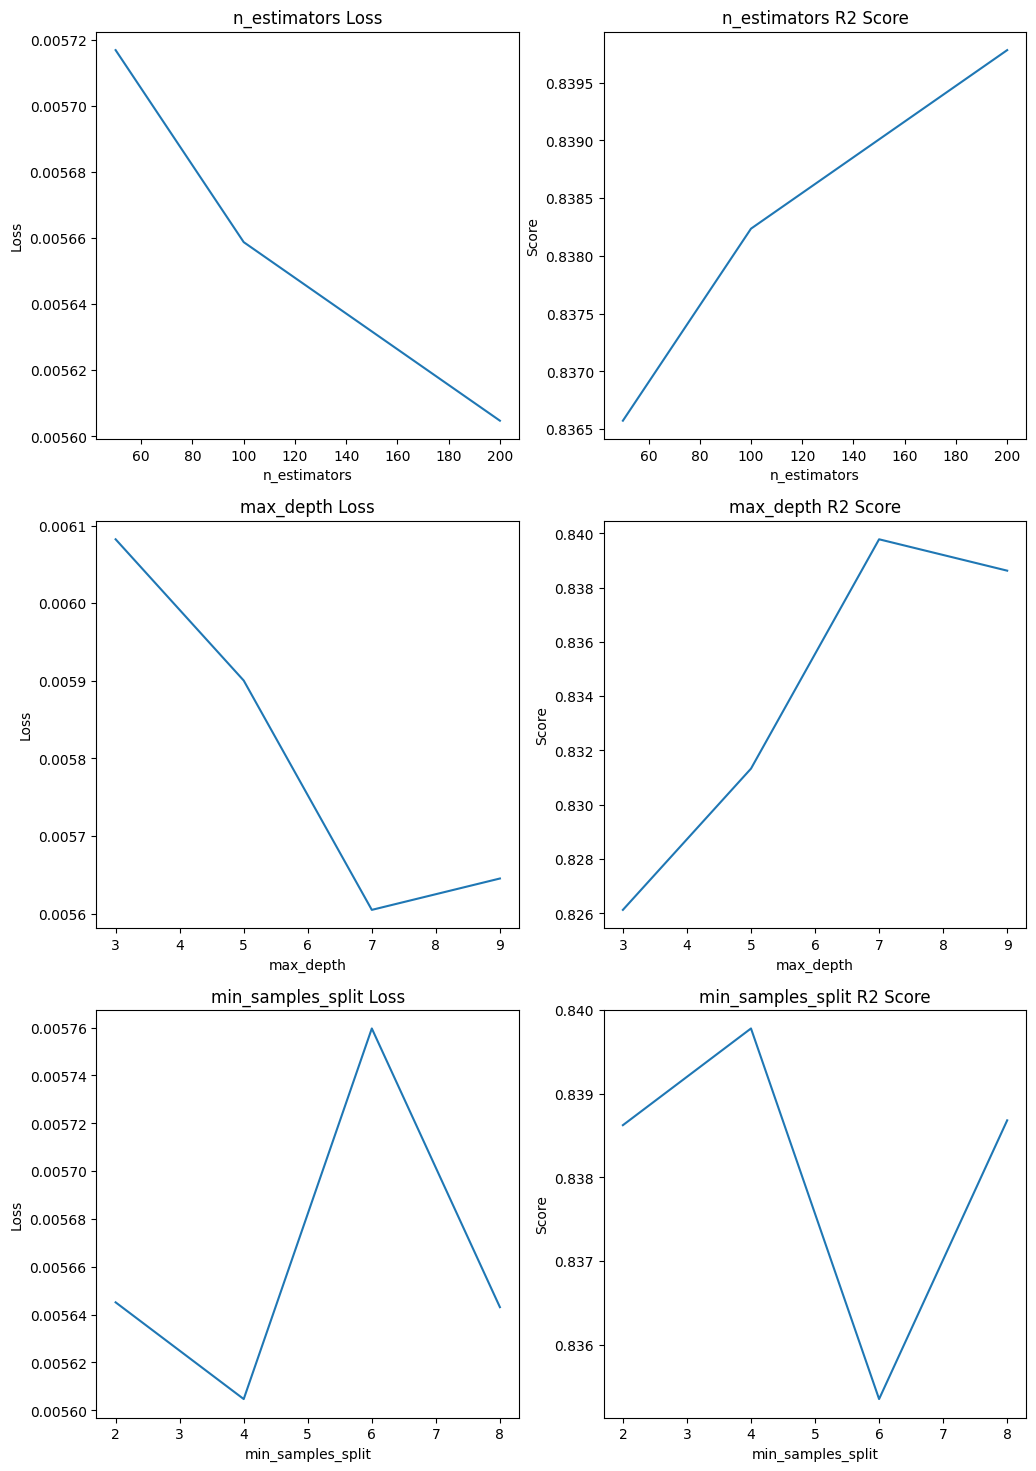

In [70]:
best_params = find_best_params(GradientBoostingRegressor, params, X_pca_train_grid, y_pca_train_grid, X_pca_val, y_pca_val)

In [71]:
best_params

{'max_depth': 7,
 'min_samples_split': 4,
 'n_estimators': 200,
 'random_state': 42}

In [72]:
gb_pca_model = RegressionModel(GradientBoostingRegressor(**best_params), X_pca_train, y_pca_train, X_pca_test, y_pca_test, "Gradient Boosting PCA")
gb_pca_model.fit_and_predict()
gb_pca_model

Gradient Boosting PCA:
	Train: MSE: 0.000, R2: 0.984
	Test: MSE: 0.006, R2: 0.814

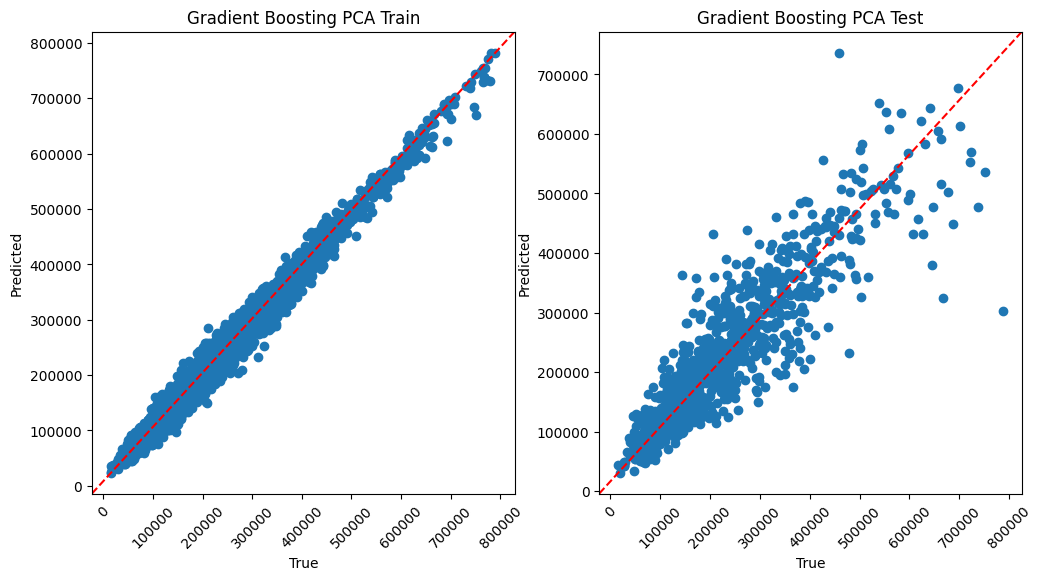

In [73]:
gb_pca_model.reverse_scale(y_scaler)
gb_pca_model.plot()

As we can see, the model performance on the Train data is almost the same as the previous model. However, the model performance on the Test data is worse than the previous model. This shows that the model is overfitting.

#### Neural Network

In [74]:
model = create_nn_model(X_pca_train.shape[1], 1)
nn_pca_model = NNRegressionModel(model, X_pca_train, y_pca_train, X_pca_test, y_pca_test, "Neural Network PCA")
nn_pca_model.fit_and_predict(epochs=50)
nn_pca_model

Epoch 1/50
100/100 [==============================] - 1s 5ms/step - loss: 0.0111 - val_loss: 0.0085 - lr: 0.0010
Epoch 2/50
100/100 [==============================] - 0s 4ms/step - loss: 0.0084 - val_loss: 0.0082 - lr: 9.0000e-04
Epoch 3/50
100/100 [==============================] - 0s 4ms/step - loss: 0.0079 - val_loss: 0.0076 - lr: 8.1000e-04
Epoch 4/50
100/100 [==============================] - 0s 4ms/step - loss: 0.0077 - val_loss: 0.0066 - lr: 7.2900e-04
Epoch 5/50
100/100 [==============================] - 0s 4ms/step - loss: 0.0069 - val_loss: 0.0062 - lr: 6.5610e-04
Epoch 6/50
100/100 [==============================] - 0s 4ms/step - loss: 0.0065 - val_loss: 0.0061 - lr: 5.9049e-04
Epoch 7/50
100/100 [==============================] - 0s 4ms/step - loss: 0.0066 - val_loss: 0.0061 - lr: 5.3144e-04
Epoch 8/50
100/100 [==============================] - 0s 4ms/step - loss: 0.0062 - val_loss: 0.0064 - lr: 4.7830e-04
Epoch 9/50
100/100 [==============================] - 0s 4ms/step - 

Neural Network PCA:
	Train: MSE: 0.004, R2: 0.866
	Test: MSE: 0.006, R2: 0.827

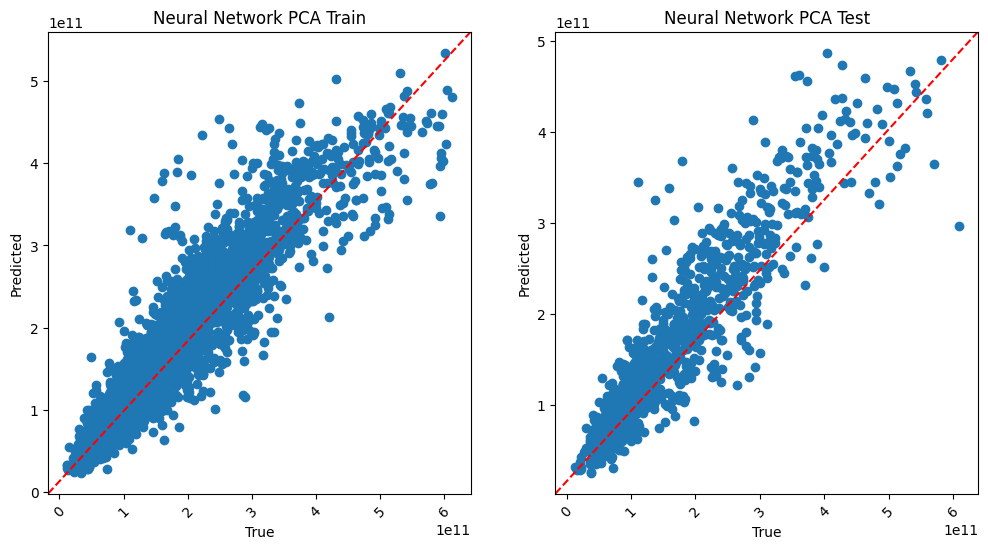

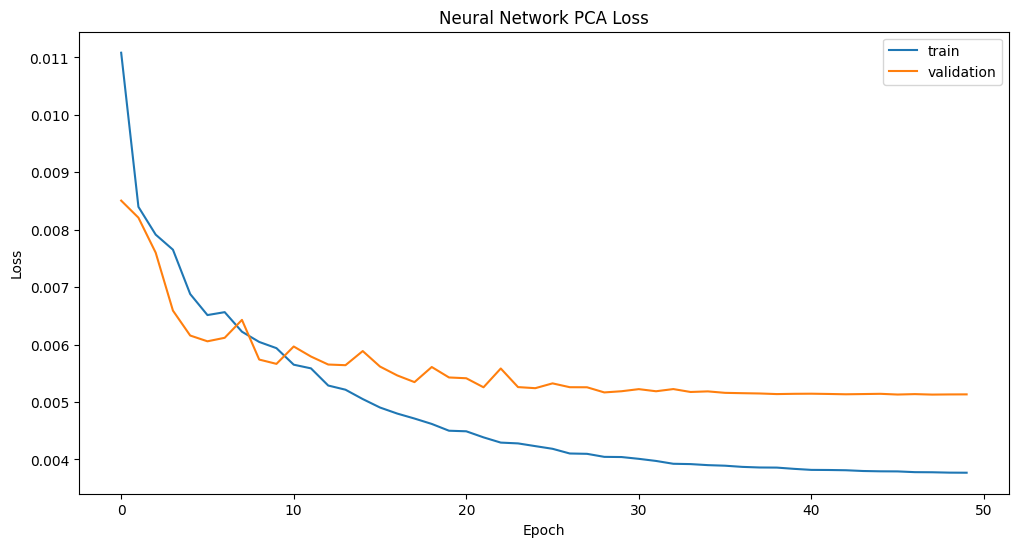

In [78]:
nn_pca_model.reverse_scale(y_scaler)
nn_pca_model.plot()

We can see that the model is not overfitting. However, it isn't performing as well as the model without PCA. This is expected as we are losing some of the variance.

#### Comparison

In [79]:
models = [rf_model, rf_pca_model, gb_model, gb_pca_model, nn_model, nn_pca_model]
print_all_models_tabulated_results(models)

Random Forest
+-------+-------+-------+
| Data  |  MSE  |  R2   |
+-------+-------+-------+
| Train | 0.000 | 0.988 |
| Test  | 0.003 | 0.912 |
+-------+-------+-------+

Random Forest PCA
+-------+-------+-------+
| Data  |  MSE  |  R2   |
+-------+-------+-------+
| Train | 0.001 | 0.965 |
| Test  | 0.006 | 0.812 |
+-------+-------+-------+

Gradient Boosting
+-------+-------+-------+
| Data  |  MSE  |  R2   |
+-------+-------+-------+
| Train | 0.001 | 0.980 |
| Test  | 0.002 | 0.932 |
+-------+-------+-------+

Gradient Boosting PCA
+-------+-------+-------+
| Data  |  MSE  |  R2   |
+-------+-------+-------+
| Train | 0.000 | 0.984 |
| Test  | 0.006 | 0.814 |
+-------+-------+-------+

Neural Network
+-------+-------+-------+
| Data  |  MSE  |  R2   |
+-------+-------+-------+
| Train | 0.001 | 0.970 |
| Test  | 0.004 | 0.883 |
+-------+-------+-------+

Neural Network PCA
+-------+-------+-------+
| Data  |  MSE  |  R2   |
+-------+-------+-------+
| Train | 0.004 | 0.866 |
| Tes

### Overall Report and Discussions

This is the last step of our project! We will provide a brief report about our main steps from phase 0 till the end of this phase. We don’t want detailed information in this report; only mentioning key decisions and ideas is enough. This will show the roadmap of our project. Also we should mention the problems and challenges we faced and our solutions for them, along with some alternatives.

1. Data Gathering
   1. Finding the Last Page's Number
   2. Finding the List of Car IDs per page
   3. Extracting the Car Data per ID
   4. Saving the Scraped Data to a CSV File

   Problems:

    - The website has a lot of pages and it takes a long time to scrape all the data. We solved this problem by using the multiple threads to scrape the data faster. With this solution, we were able to scrape all the data in about 5 hours.
    - The Firefox driver used too much memory and swap space, which caused the system to freeze and increase the scraping time. We solved this problem by using the Chrome driver, which uses less memory and swap space.
    - As the scarping time was too long and internet connection was not stable, we had to implement some error handling mechanisms to prevent the program from stopping when an error occurred. We solved this problem by using the `try-except` blocks. Also, we saved the car IDs which we failed to scrape, to scrape them again.

2. Data Cleaning
   1. Loading the Data From the CSV File
   2. Dropping the Duplicates Based on the Car ID
   3. Handling Missing Values
      1. Electric Cars: We had a small amount of rows for electric cars which had many missing values. We decided to drop these rows.
      2. Rows with Missing Values: For most of the columns, we had a small amount of rows with missing values. We decided to drop these rows.
      3. Columns with Many Missing Values: For `Parking bay number` and `NaTIS Vehicle Status` columns which had many missing values, we decided to drop these columns. Also, for the `Maintenance Plan` and `Warranty` columns which also had many missing values, we decided to replace the missing values with `No`. This is because a missing value in these columns means that the car doesn't have a maintenance plan or warranty.
      4. Finance Price: This column had about 1000 missing values which we couldn't drop the rows. We decided to replace the missing values using `KNNImputer`.
      5. Colour: For this column, we didn't have NaN values but we had some rows with 'Undefined' values. We decided to drop these rows as they were very few.
      6. Gears: For the `Gears` column, we had 3 rows with value equal to 0 which we decided to drop.
      7. No of Doors: Same as above, we had 1 row with value equal to 0 which we decided to drop.
   4. Dropping Unnecessary Columns
      1. `id`: This column has unique values for each row and doesn't have any predictive power. We decided to drop this column.
      2. `Branch`: This column didn't have any predictive power. We decided to drop this column.
      3. `Variant`: This column has many unique values and doesn't have any predictive power. We decided to drop this column.
   5. Fixing Value Formats and Types
      1. `Kilowatts`: The initial format was "100 kW" which we converted to "100".
      2. `Finance Price`: The initial format was "R 10 000 p/m" which we converted to "10000".
      3. `Mileage`: The initial format was "100\xa0000 km" which we converted to "100000".
      4. `Fuel Consumption`: The initial format was "10.0 l/100km" which we converted to "10.0".
      5. `Fuel Tank Capacity`: The initial format was "100 l" which we converted to "100".
      6. `Price`: The initial format was "R 100 000" which we converted to "100000".
      7. `Engine Capacity`: The initial format was "1000 cc" which we converted to "1000".
      8. `Spare Keys`: The initial format was "Yes" and "No" which we converted to boolean values.
      9. `Category`: The initial value had some spaces at the beginning which we removed.
      10. `Dekra`: The initial value had "Dekra" at the beginning which we removed.
      11. `Drive`: This column had the values "F", "R, "FR", and "F/R" which the last two are the same. We decided to replace "F/R" with "FR".
   6. Column Reordering: We reordered the columns and moved the target column to the end.
   7. Saving the Cleaned Data to a CSV File

   Problems:

    - For fixing the format of the values and removing the unnecessary characters, we had to make sure that all the values in each column have the same unit. We solved this by finding the values that have different units using regular expressions. In this case, all the values in the column had the same unit, so we didn't have to do anything.

3. Data Preprocessing
   1. Loading the Data From the CSV File
   2. Creating New Features
      1. `Age`: We calculated the age of the cars by subtracting the year of the car from the current year.
      2. `No of Cylinder`: We extracted the number of cylinders from the `Cylinder Layout` column.
      3. `Horsepower`: We extracted the horsepower from the `Kilowatts` column.
      4. `Remaining Maintenance Plan`: We calculated the remaining days of the maintenance plan by subtracting the current date from the end date of the maintenance plan.
      5. `Remaining Warranty`: We calculated the remaining days of the warranty by subtracting the current date from the end date of the warranty.
   3. Encoding Categorical Features
      1. One-Hot Encoding: We used one-hot encoding for the nominal features.
      2. Label Encoding: We used label encoding for the ordinal features.
   4. Removing Outliers: We removed the outliers using the Z-score method.
   5. Saving the Preprocessed Data to a CSV File

   Problems:

    - For the `Make Model` column, we should have used one-hot encoding as it is a nominal feature. However, we used label encoding which is not suitable for this column. This is because the column has many unique values which will increase the dimensionality of the data, which will lead to the curse of dimensionality.

4. Exploratory Data Analysis
   1. Loading the Data From the CSV File
   2. Profile Report using `ydata_profiling` Library
   3. Correlation Analysis
   4. Distribution Plots: We plotted the distribution of most of the features.
   5. Rankings
      1. Top 10 Makes
      2. Top 10 Models
      3. Top 3 Body Types
      4. Top 3 Colours
      5. Top 3 Cylinder Layouts
   6. Relationships Between Features
      1. Price vs Registration Year
      2. Price vs Mileage
      3. Mileage vs Registration Year
      4. Engine Capacity vs Kilowatts
      5. Finance Price vs Price
   7. Outliers Using Box Plots
      1. Age
      2. Finance Price
      3. Fuel Consumption
      4. Fuel Tank Capacity
      5. Horsepower
      6. Mileage
      7. Price

   Problems:
    - The `Finance Price` and `Price` columns have a very high correlation which means that they are highly correlated. This is because the `Finance Price` is the price of the car per month which is calculated based on the `Price` of the car. This is why we decided to drop the `Finance Price` column in the next phase.

5. Regression Analysis
   1. Loading the Data From the CSV File
   2. Preprocessing
      1. Converting Boolean Features to Binary
      2. Splitting the Data into Features and Target
      3. Scaling the Features
      4. Scaling the Target: This is because the target variable is the price of the cars and it contains a wide range of values, we need to scale it to make the training process easier for the model.
   3. Feature Engineering and Selection
      1. Constants
         1. Body Type_Cabriolet: This feature is constant and has no predictive power. We dropped this feature.
      2. Correlation
         1. Fuel Consumption: This feature has a low correlation with the target variable and has a high correlation with the other features. We dropped this feature.
      3. Dimensionality Reduction
         1. Two Dimensions: We used the PCA method to reduce the dimensions of numerical features to two dimensions and calculated the retained variance.
         2. 95% Variance: We calculated the minimum number of dimensions required in the new space to retain 95% of the original variance. We saved both the original data and the dimension-reduced one for the next parts.
      4. Model Training
         1. Neural Network
         2. Linear Regression
         3. SVM
         4. Random Forest
         5. Gradient Boosting
         6. KNN
         7. Decision Tree
      5. Comparison: Random Forest and Gradient Boosting models performed the best.
      6. Feature Analysis: We trained the best-performing method using the dimension-reduced data and compared the results with the previous models. We used the Random Forest and Gradient Boosting models for this analysis.

   Problems:

    - The dimension reduction using PCA didn't improve the model performance. This is because we lost some of the variance which affected the model performance. We dropped the one-hot encoded features before applying PCA. This is because these features are too many and they are very imbalance which will affect the PCA results. Also, we removed the `Make Model` feature as it should have been One-Hot Encoded but it was not.

## References